# Capstone Assignment Three

## Which city is the best place to open an Italian Restaurant?

###### The audience could be a CEO who is interested in continuing a successful restaurant chain in another city. The cities can be global. I have chosen London, Paris, New York, Toronto, San Francisco, Berlin, Moscow , Athens and Madrid. However the list "cities" can be edited and the code can be extended to assess cities all over a country or other countries. I have chosen capital cities. 

##### I have levereged foursquare in this code to count the number of Italian restaurants within a radius of 20km in each city, and compared this number with a population density (per 100000). I have assumed that a higher rate of Italian restaurants per capita is correlated positively with demand and therefore the restaurant (assuming it is currently popular and well established) will do well well if that rate is higher. Bar chart is printed at the bottom.  

In [274]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [275]:
import json # library to handle JSON files
#-------------------------------------------------
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#-------------------------------------------------
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#-------------------------------------------------
# import k-means from clustering stage
from sklearn.cluster import KMeans
#-------------------------------------------------
#
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#-------------------------------------------------
print('Libraries imported.')


Libraries imported.


In [276]:
CLIENT_ID = '5J5EM2PASASPW1ZPYCPNH4IQDVAPCGIIRLAI34BEAGIGFWH0' # your Foursquare ID
CLIENT_SECRET = '12QV4XUHJSKE4V4U0SQL3KPIM1JHGL5PUWHGQLVDEQAX1L2I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5J5EM2PASASPW1ZPYCPNH4IQDVAPCGIIRLAI34BEAGIGFWH0
CLIENT_SECRET:12QV4XUHJSKE4V4U0SQL3KPIM1JHGL5PUWHGQLVDEQAX1L2I


#### The function Settings has to be looped over so I have made it into a function.

In [277]:
def Settings(i,radius,limit,search_query):
    address = '{}'.format(cities[i])
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))
    urlsearch = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,latitude,longitude,VERSION,search_query,radius,limit)
    resultssearch=requests.get(urlsearch).json()
    return resultssearch

#### Below parameters of Settings are declared. The search query, radius and limit for the parameters. The list of cities is also declared.

In [278]:
cities=('London','Paris','New York','Toronto','San Francisco','Berlin','Moscow','Athens','Madrid')
rest = []
df=[]
locations=[]
radius=20000
limit=1000
search_query='Italian Restaurant'

for i in range(len(cities)):
    resultssearch=Settings(i,radius,limit,search_query)
    rest=[]
    for j in range(len(resultssearch['response']['venues'])):
        if resultssearch['response']['venues'][j]['categories']!=[]:
            rest.append(resultssearch['response']['venues'][j]['categories'])
        #locations.append(resultssearch[])
    df.append(rest)
    
GlobalRestaurants=pd.DataFrame(df).T
GlobalRestaurants=GlobalRestaurants.set_axis(cities,axis=1,inplace=False)



The geograpical coordinate of London are 51.5073219, -0.1276474.
The geograpical coordinate of Paris are 48.8566101, 2.3514992.
The geograpical coordinate of New York are 40.7127281, -74.0060152.
The geograpical coordinate of Toronto are 43.653963, -79.387207.
The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.
The geograpical coordinate of Berlin are 52.5170365, 13.3888599.
The geograpical coordinate of Moscow are 55.7504461, 37.6174943.
The geograpical coordinate of Athens are 33.9597677, -83.376398.
The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


##### The code block below populates GlobalRestaurantsCuisine which is the list of all types of cuisine associated with the search "italian restaurant". This dataframe is assessed by eye, I was interested in the results associated with the search and filter out anything unrelated. I have also counted the terms with "Pizza" in the data as Italian cuisine.  

In [285]:
GlobalRestaurantsCuisine=[]
for i in range(len(cities)):
    cuisine=[]
    for j in range(len(GlobalRestaurants[cities[i]])):
        if GlobalRestaurants[cities[i]][j] is not None:
            cuisine.append(GlobalRestaurants[cities[i]][j][0]['name'])
    
    GlobalRestaurantsCuisine.append(cuisine) 
    
GlobalRestaurantsCuisine=pd.DataFrame(GlobalRestaurantsCuisine).T.set_axis(cities,axis=1,inplace=False)
GlobalRestaurantsCuisine

,London,Paris,New York,Toronto,San Francisco,Berlin,Moscow,Athens,Madrid
0,Italian Restaurant,French Restaurant,Italian Restaurant,Italian Restaurant,Pizza Place,Japanese Restaurant,Italian Restaurant,Pizza Place,Café
1,Italian Restaurant,Italian Restaurant,Italian Restaurant,Italian Restaurant,Italian Restaurant,Breakfast Spot,Embassy / Consulate,Italian Restaurant,Restaurant
2,Italian Restaurant,Café,Food,Restaurant,Italian Restaurant,German Restaurant,Italian Restaurant,Pizza Place,Paella Restaurant
3,Italian Restaurant,Gourmet Shop,Italian Restaurant,American Restaurant,Food,Embassy / Consulate,Nightclub,Italian Restaurant,Mediterranean Restaurant
4,Italian Restaurant,French Restaurant,Italian Restaurant,American Restaurant,Pizza Place,Restaurant,Chinese Restaurant,Breakfast Spot,Boutique
5,Italian Restaurant,Monument / Landmark,Italian Restaurant,Italian Restaurant,Food,Vegetarian / Vegan Restaurant,Winery,Food,Spanish Restaurant
6,Italian Restaurant,Vietnamese Restaurant,Italian Restaurant,Italian Restaurant,Italian Restaurant,French Restaurant,Pizza Place,Japanese Restaurant,Restaurant
7,Italian Restaurant,French Restaurant,Italian Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Restaurant,Seafood Restaurant,Fried Chicken Joint,Spanish Restaurant
8,Italian Restaurant,French Restaurant,Italian Restaurant,Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Chinese Restaurant,Mediterranean Restaurant
9,Italian Restaurant,Italian Restaurant,Italian Restaurant,Embassy / Consulate,Italian Restaurant,Restaurant,Asian Restaurant,Food,Pizza Place


#### Create a dataframe of all the terms that suggest Italian cuisine, count the number and compare with population, convert to bar chart.

In [283]:
from itertools import compress
FreqTab=[]

for i in range(len(cities)):
    x=GlobalRestaurantsCuisine[cities[i]].str.contains('Italian|Pizza',case=False) # search for Pizza and Italian
    f=len(list(compress(GlobalRestaurantsCuisine[cities[i]], x)))
    FreqTab.append(f)
FreqTab
FreqTab = [i*100000 for i in FreqTab]

pop=(8900000.0,2141000.0,8623000.0,2930000.0,884363.0,3748000.0,11920000,664000.0,6550000.0)
for i in range(len(pop)):
    FreqTab[i]=FreqTab[i]/pop[i]
    
FreqTab=pd.DataFrame(FreqTab).T
FreqTab.set_axis(cities,axis=1,inplace=True)
FreqTab

,London,Paris,New York,Toronto,San Francisco,Berlin,Moscow,Athens,Madrid
0,0.337079,0.140121,0.533457,0.341297,1.017682,0.133404,0.067114,1.506024,0.045802


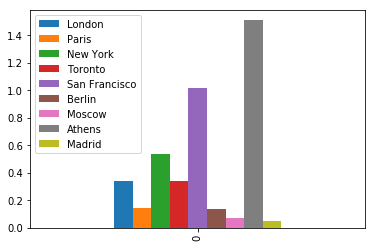

In [284]:
p=FreqTab.plot.bar()
ax1 = plt.axes()
ax1.xaxis.label.set_visible(False)

### Conclusion/Evaluation
#### Athens has the highest number of Italian restaurants (per capita) followed by San Francisco and New York. 
#### An investigation using the stats feauture would have been more comprehensive but only a manager can access this information. You can measure the success of a restaurant by measuring profit, number of likes and visits from customers and compare these results with location(neighbourhood), cuisine type, etc. But most importantly it would help if foursquare can provide more than 50 results for each city.

#### In case the bar chart does not print out (been having issues with github), here is a pasted image. In order of highest to lowest, the first three values (as in the data frame) are 1.506, 1.017 and 0.533. The axes did not copy in the pasted image.
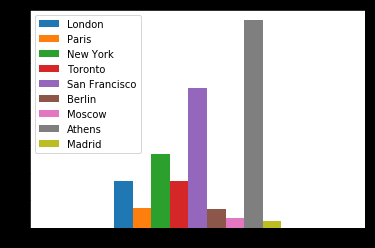